# KMeans
## Elaborado por: Martín Ordóñez


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/Users/matin/Library/Mobile Documents/com~apple~CloudDocs/Coding Dojo Python/Clusterización /cust_seg.csv')
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [13]:
df['Defaulted'].fillna(df['Defaulted'].mode()[0], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        850 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [44]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        850 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
 9   cluster          850 non-null    int32  
dtypes: float64(4), int32(1), int64(5)
memory usage: 63.2 KB


In [24]:
# Instancia de escalador estándar
scaler = StandardScaler()
# Ajustar y transformar datos
df_scaled = scaler.fit_transform(df)

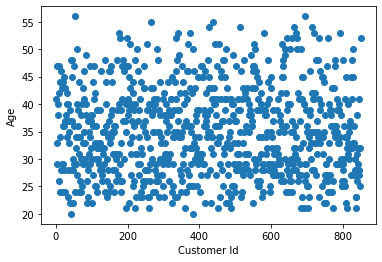

In [16]:
# Visualizar datos
plt.scatter(df['Customer Id'], df['Age'])
plt.xlabel('Customer Id')
plt.ylabel('Age');

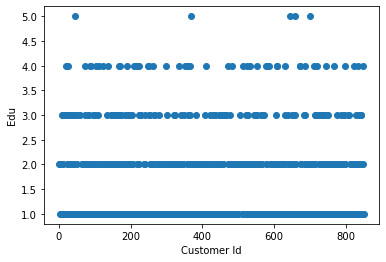

In [17]:
plt.scatter(df['Customer Id'], df['Edu'])
plt.xlabel('Customer Id')
plt.ylabel('Edu');

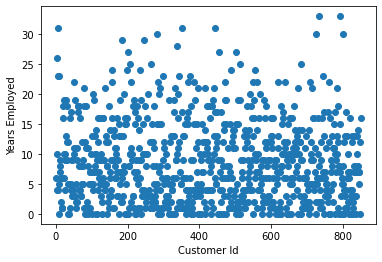

In [18]:
plt.scatter(df['Customer Id'], df['Years Employed'])
plt.xlabel('Customer Id')
plt.ylabel('Years Employed');

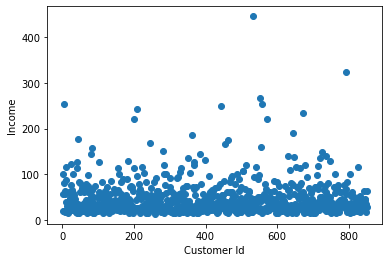

In [19]:
plt.scatter(df['Customer Id'], df['Income'])
plt.xlabel('Customer Id')
plt.ylabel('Income');

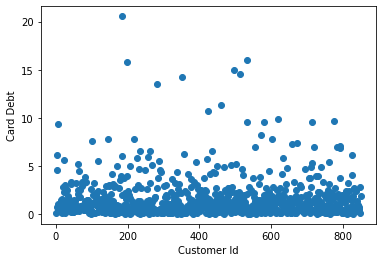

In [20]:
plt.scatter(df['Customer Id'], df['Card Debt'])
plt.xlabel('Customer Id')
plt.ylabel('Card Debt');


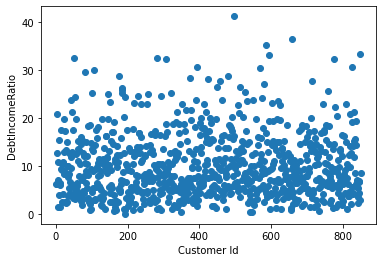

In [21]:
plt.scatter(df['Customer Id'], df['DebtIncomeRatio'])
plt.xlabel('Customer Id')
plt.ylabel('DebtIncomeRatio');


In [26]:
from sklearn.decomposition import PCA

In [37]:
pca_2 = PCA(n_components=2)
pca_result = pca_2.fit_transform(df_scaled)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))

# >> Explained variation per principal component: [0.36198848 0.1920749 ]

print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

# >> Cumulative variance explained by 2 principal components: 55.41%

Explained variation per principal component: [0.34251734 0.18275018]
Cumulative variance explained by 2 principal components: 52.53%


In [29]:
def kmean_hyper_param_tuning(data):
    """
    Hyper parameter tuning to select the best from all the parameters on the basis of silhouette_score.
    :param data: dimensionality reduced data after applying PCA
    :return: best number of clusters for the model (used for KMeans n_clusters)
    """
    # candidate values for our number of cluster
    parameters = [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]

    # instantiating ParameterGrid, pass number of clusters as input
    parameter_grid = ParameterGrid({'n_clusters': parameters})

    best_score = -1
    kmeans_model = KMeans()     # instantiating KMeans model
    silhouette_scores = []

    # evaluation based on silhouette_score
    for p in parameter_grid:
        kmeans_model.set_params(**p)    # set current hyper parameter
        kmeans_model.fit(data)          # fit model on wine dataset, this will find clusters based on parameter p

        ss = metrics.silhouette_score(data, kmeans_model.labels_)   # calculate silhouette_score
        silhouette_scores += [ss]       # store all the scores

        print('Parameter:', p, 'Score', ss)

        # check p which has the best score
        if ss > best_score:
            best_score = ss
            best_grid = p

    # plotting silhouette score
    plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
    plt.xticks(range(len(silhouette_scores)), list(parameters))
    plt.title('Silhouette Score', fontweight='bold')
    plt.xlabel('Number of Clusters')
    plt.show()

    return best_grid['n_clusters']

NameError: name 'centroids_pca' is not defined

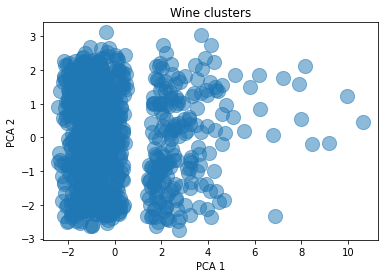

In [39]:

    # ------------------ Using Matplotlib for plotting-----------------------
    x = pca_result[:, 0]
    y = pca_result[:, 1]

    plt.scatter(x, y, alpha=0.5, s= 200)  # plot different colors per cluster
    plt.title('Clientes Cluster')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5,
                color='red', edgecolors="black", lw=1.5)

    plt.show()

In [42]:
kmeans = KMeans(n_clusters=2)    
kmeans.fit(df_scaled)

KMeans(n_clusters=2)

In [33]:
def main():
    print("1. Loading Wine dataset")
    data_scaled = load_embeddings()

    print("2. Reducing via PCA")
    pca_result, pca_2 = pca_embeddings(data_scaled)

    print("3. HyperTuning the Parameter for KMeans")
    optimum_num_clusters = kmean_hyper_param_tuning(data_scaled)
    print("optimum num of clusters =", optimum_num_clusters)

    # fitting KMeans
    kmeans = KMeans(n_clusters=optimum_num_clusters)
    kmeans.fit(data_scaled)
    centroids = kmeans.cluster_centers_
    centroids_pca = pca_2.transform(centroids)

    print("4. Visualizing the data")
    visualizing_results(pca_result, kmeans.labels_, centroids_pca)



In [47]:
# Instanciar KMeans
np.random.seed(37535)
kmeans = KMeans(n_clusters = 3, random_state = 37535)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=37535)

In [48]:
# Segmentacion de los clientes
df['cluster'] = kmeans.labels_ + 1

In [55]:
pip install -U seaborn

     |████████████████████████████████| 292 kB 967 kB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/anaconda3/lib/python3.8/site-packages (0.11.2)
Note: you may need to restart the kernel to use updated packages.


In [62]:
pip install --upgrade matplotlib

  Using cached matplotlib-3.5.1-cp38-cp38-macosx_10_9_x86_64.whl (7.3 MB)
     |████████████████████████████████| 895 kB 977 kB/s eta 0:00:01     |██████████████████████▎         | 624 kB 977 kB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
Note: you may need to restart the kernel to use updated packages.


In [59]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

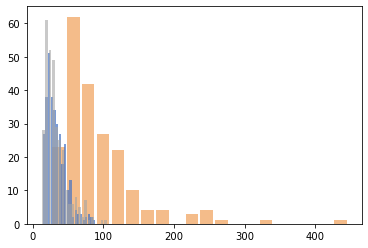

In [76]:
h1 = plt.hist(data = df[df['cluster'] == 1], x = 'Income', bins = 20, color='#F2AB6D', rwidth=0.85, alpha = 0.8,label = 'Cluster 1')
h2 = plt.hist(data = df[df['cluster'] == 2], x = 'Income', bins = 20, color='#4472C4', rwidth=0.85, alpha = 0.7,label = 'Cluster 2')
h3 = plt.hist(data = df[df['cluster'] == 3], x = 'Income', bins = 20, color='#A5A5A5', rwidth=0.85, alpha = 0.6,label = 'Cluster 3')

(array([23., 62., 42., 27., 22., 10.,  4.,  4.,  0.,  3.,  4.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 26.,  47.,  68.,  89., 110., 131., 152., 173., 194., 215., 236.,
        257., 278., 299., 320., 341., 362., 383., 404., 425., 446.]),
 <a list of 20 Patch objects>)

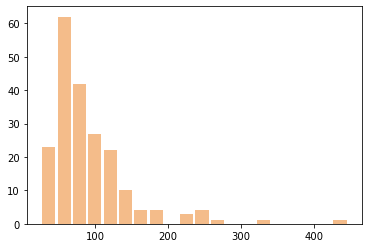

In [77]:
plt.hist(data = df[df['cluster'] == 1], x = 'Income', bins = 20, color='#F2AB6D', rwidth=0.85, alpha = 0.8,label = 'Cluster 1')

(array([27., 38., 51., 38., 34., 30., 27., 18., 24., 10., 13.,  2.,  4.,
         3.,  3.,  1.,  2.,  3.,  2.,  1.]),
 array([14.  , 17.75, 21.5 , 25.25, 29.  , 32.75, 36.5 , 40.25, 44.  ,
        47.75, 51.5 , 55.25, 59.  , 62.75, 66.5 , 70.25, 74.  , 77.75,
        81.5 , 85.25, 89.  ]),
 <a list of 20 Patch objects>)

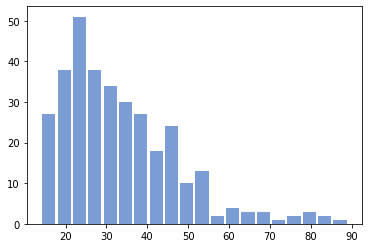

In [78]:
plt.hist(data = df[df['cluster'] == 2], x = 'Income', bins = 20, color='#4472C4', rwidth=0.85, alpha = 0.7,label = 'Cluster 2')

(array([28., 61., 52., 49., 29., 25., 22., 10.,  6.,  6.,  8.,  5.,  2.,
         7.,  1.,  2.,  0.,  0.,  1.,  1.]),
 array([ 13. ,  17.6,  22.2,  26.8,  31.4,  36. ,  40.6,  45.2,  49.8,
         54.4,  59. ,  63.6,  68.2,  72.8,  77.4,  82. ,  86.6,  91.2,
         95.8, 100.4, 105. ]),
 <a list of 20 Patch objects>)

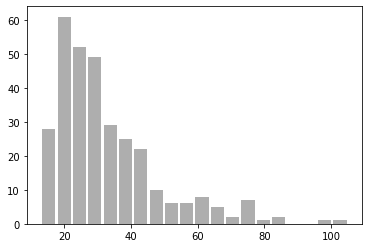

In [80]:
plt.hist(data = df[df['cluster'] == 3], x = 'Income', bins = 20, color='#A5A5A5', rwidth=0.85, alpha = 0.9,label = 'Cluster 3')

El tercer cluster tiene un ingreso promedio más alto

(array([ 4.,  2.,  0., 10., 10., 11., 15., 26.,  4., 31., 23., 14., 13.,
        17.,  5.,  5.,  4.,  2.,  6.,  2.]),
 array([ 0.  ,  1.65,  3.3 ,  4.95,  6.6 ,  8.25,  9.9 , 11.55, 13.2 ,
        14.85, 16.5 , 18.15, 19.8 , 21.45, 23.1 , 24.75, 26.4 , 28.05,
        29.7 , 31.35, 33.  ]),
 <a list of 20 Patch objects>)

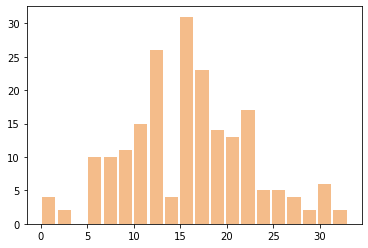

In [82]:
plt.hist(data = df[df['cluster'] == 1], x = 'Years Employed', bins = 20, color='#F2AB6D', rwidth=0.85, alpha = 0.8,label = 'Cluster 1')

(array([63., 29., 20., 25., 18., 28., 41., 20., 16., 15., 12., 13.,  7.,
        12.,  3.,  4.,  2.,  0.,  1.,  2.]),
 array([ 0.  ,  1.15,  2.3 ,  3.45,  4.6 ,  5.75,  6.9 ,  8.05,  9.2 ,
        10.35, 11.5 , 12.65, 13.8 , 14.95, 16.1 , 17.25, 18.4 , 19.55,
        20.7 , 21.85, 23.  ]),
 <a list of 20 Patch objects>)

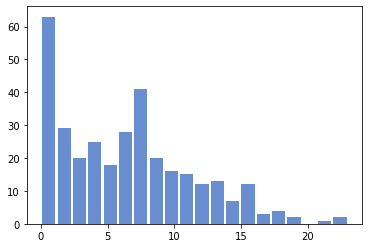

In [83]:
plt.hist(data = df[df['cluster'] == 2], x = 'Years Employed', bins = 20, color='#4472C4', rwidth=0.85, alpha = 0.8,label = 'Cluster 2')

(array([34., 30., 21., 28., 32., 27., 19., 16., 16., 21., 15.,  9., 10.,
         9.,  5.,  6.,  7.,  3.,  3.,  4.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <a list of 20 Patch objects>)

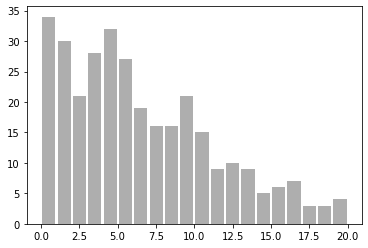

In [84]:
plt.hist(data = df[df['cluster'] == 3], x = 'Years Employed', bins = 20, color='#A5A5A5', rwidth=0.85, alpha = 0.9,label = 'Cluster 3')

El tercer cluster tiene personas con mayor experiencia laboral